## Building Social Networks from Swipe Data

### Project: 

Our goal is to take the swipe data from a university meal system and collect the "predicted social network" from this data, based on the assumption that generally, friends eat dinner with each other, and hence swipe at similar times. 

### Assumptions: 
1. We first assume that we recieve a csv file with the parameters of 'Time Swiped' and 'Name'. 

### Importing necessary libraries and define changeable parameters:

In [13]:
import networkx as nx
import matplotlib
from matplotlib.pyplot import figure
import pandas as pd

In [14]:
epsilon = 5

### Importing CSV and processing dataframe:

Here we need to take the general timeswipe data to create an friendship matrix. We first must take the timeswipe data and find those pairs that satisfy a difference in swipe time less than (base_swipe_time). We then take each of these pairs and create a friendship matrix. In the friendship matrix, we list each edge of friendship between two people within our social network.

In [34]:
edges = pd.read_csv('edges.csv')
print(edges)

print("\n")

time_series = pd.read_csv('time_series.csv')
print(time_series)

  Subject  Friend
0   alice     bob
1   alice   floyd
2   floyd     bob
3    carl     NaN
4  duggan  ingrid
5  george    jack
6   klien  george
7  george   klien
8    eric   henry


    time    name
0     10   alice
1     12     bob
2     40    carl
3    256  duggan
4     38    eric
5     15   floyd
6    108  george
7     43   henry
8    254  ingrid
9    110    jack
10   113   klien


In [ ]:
# time_series = time_series.drop(labels=0, axis=0)
print(time_series)

print(time_series.iloc[2,0])

In [35]:
names = time_series[time_series.columns[1]].values.tolist()
print(names)

print("\n")

times = time_series[time_series.columns[0]].values.tolist()
print(times)


['alice', 'bob', 'carl', 'duggan', 'eric', 'floyd', 'george', 'henry', 'ingrid', 'jack', 'klien']


[10, 12, 40, 256, 38, 15, 108, 43, 254, 110, 113]


### Creating an "Epsilon Function":

We want to define a "friend" as someone who had a time stamp within some "epsilon" of your time. Ex. If alice swipe at 10 seconds and bob, her friend, swipes 2 seconds later, they are probably friends because they swiped within (epsilon) seconds of each other. I've defined the epsilon to be 5 seconds above, hence the difference of alice and bob's time is 2 seconds, so they are friends. 

We'll define a function that takes the input of the index of name and returns true or false as to whether they are friends or not. 

In [36]:
def epsilon_validator(x, y):
    if abs(time_series.iloc[x,0] - time_series.iloc[y,0]) <= epsilon: 
        return True
    else : 
        return False

print(epsilon_validator(0,5))
print(len(names))

True
11


In [33]:
for x in range(len(names)) :
    for y in range(len(names)) :
        print(names[x], "+", names[y], "=", epsilon_validator(x, y))

# list_of_paired_times = [(times[p1], times[p2]) for p1 in range(len(times)) for p2 in range(p1+1,len(times))]
# print(list_of_paired_times)

# print("\n")

# list_of_paired_names = [(names[p1], names[p2]) for p1 in range(len(names)) for p2 in range(p1+1,len(names))]
# print(list_of_paired_names)

alice + alice = True
alice + bob = True
alice + carl = False
alice + duggan = False
alice + eric = False
alice + floyd = False
alice + george = False
alice + henry = False
alice + ingrid = False
alice + jack = False
alice + klien = False
bob + alice = True
bob + bob = True
bob + carl = False
bob + duggan = False
bob + eric = False
bob + floyd = True
bob + george = False
bob + henry = False
bob + ingrid = False
bob + jack = False
bob + klien = False
carl + alice = False
carl + bob = False
carl + carl = True
carl + duggan = False
carl + eric = True
carl + floyd = False
carl + george = False
carl + henry = True
carl + ingrid = False
carl + jack = False
carl + klien = False
duggan + alice = False
duggan + bob = False
duggan + carl = False
duggan + duggan = True
duggan + eric = False
duggan + floyd = False
duggan + george = False
duggan + henry = False
duggan + ingrid = True
duggan + jack = False
duggan + klien = False
eric + alice = False
eric + bob = False
eric + carl = True
eric + duggan

### Create Graph Visualization

Using the dataframe, we use the networkx library to draw a graph which contains the friendship pairs that we built earlier in the dataframe. The graph is then styled and can be used to visualize the social network within the university or corporate setting.

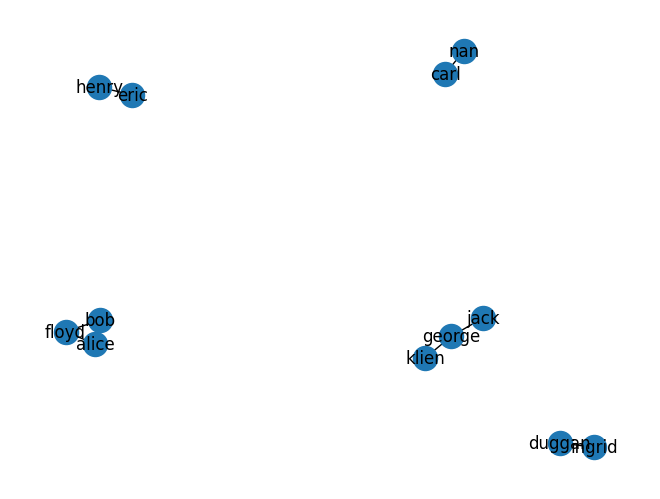

In [3]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'Subject', 'Friend')

nx.draw(G, with_labels=True)

### Relevant Uses and Further Work

Beyond the fact that visualizing the social network around you is simply really cool, there are also relevant and important uses of social network visualization, allowing institutions to understand it's own dynamics at new levels of nuance. Some of the possible uses of this work are listed below.
1. HR Employee Dissatisfaction: 
2. University mental health targeting: 
3. DEI Accountability: 
4. Targeted Marketing:  